In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('saas.csv')

In [3]:
df.Month_Invoiced.value_counts()

2014-01-31    20000
2014-02-28    19800
2014-03-31    19599
2014-04-30    19413
2014-05-31    19221
2014-06-30    19038
2014-07-31    18851
2014-08-31    18672
2014-09-30    18494
2014-10-31    18313
2014-11-30    18145
2014-12-31    17996
2015-01-31    17829
2015-02-28    17680
2015-03-31    17530
2015-04-30    17376
2015-05-31    17225
2015-06-30    17089
2015-07-31    16951
2015-08-31    16817
2015-09-30    16671
2015-10-31    16529
2015-11-30    16387
2015-12-31    16268
2016-01-31    16142
2016-02-29    16019
2016-03-31    15895
2016-04-30    15777
2016-05-31    15685
2016-06-30    15571
2016-07-31    15460
2016-08-31    15355
2016-09-30    15240
2016-10-31    15144
2016-11-30    15049
2016-12-31    14938
2017-01-31    14840
2017-02-28    14741
2017-03-31    14665
2017-04-30    14576
2017-05-31    14475
2017-06-30    14400
2017-07-31    14312
2017-08-31    14209
2017-09-30    14131
2017-10-31    14041
2017-11-30    13985
2017-12-31    13914
Name: Month_Invoiced, dtype: int64

In [4]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [5]:
df.dtypes

Month_Invoiced        object
Customer_Id            int64
Invoice_Id             int64
Subscription_Type    float64
Amount               float64
dtype: object

In [6]:
df['Month_Invoiced'] = pd.to_datetime(df.Month_Invoiced)

In [7]:
df.set_index('Month_Invoiced', inplace=True)

In [8]:
df.head()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


# Predict 2018 total monthly sales for store 1 by creating a model using prophet

In [9]:
train = df[:'2016']
test = df['2017':]

print(train.nunique())
print(test.nunique())

Customer_Id           27000
Invoice_Id           618169
Subscription_Type         5
Amount                    5
dtype: int64
Customer_Id           17040
Invoice_Id           172289
Subscription_Type         5
Amount                    5
dtype: int64


# Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
simple average

moving average

Holt's linear trend model

Based on previous year/month/etc (your choice)

In [10]:
sales = train.resample('M').Amount.mean()

In [11]:
sales

Month_Invoiced
2014-01-31    1.792500
2014-02-28    1.878283
2014-03-31    1.953926
2014-04-30    2.022099
2014-05-31    2.099527
2014-06-30    2.166982
2014-07-31    2.237017
2014-08-31    2.314160
2014-09-30    2.383205
2014-10-31    2.450718
2014-11-30    2.510058
2014-12-31    2.567793
2015-01-31    2.633070
2015-02-28    2.687783
2015-03-31    2.739589
2015-04-30    2.794659
2015-05-31    2.846154
2015-06-30    2.895722
2015-07-31    2.955873
2015-08-31    3.002616
2015-09-30    3.058305
2015-10-31    3.112408
2015-11-30    3.128089
2015-12-31    3.166031
2016-01-31    3.218622
2016-02-29    3.243336
2016-03-31    3.271469
2016-04-30    3.307980
2016-05-31    3.335990
2016-06-30    3.367478
2016-07-31    3.408473
2016-08-31    3.447737
2016-09-30    3.476050
2016-10-31    3.512282
2016-11-30    3.546747
2016-12-31    3.569420
Freq: M, Name: Amount, dtype: float64

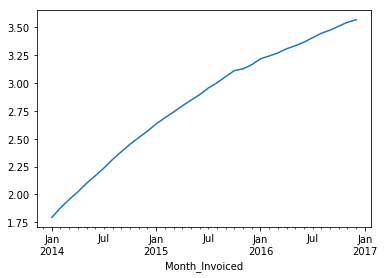

In [12]:
sales.plot()

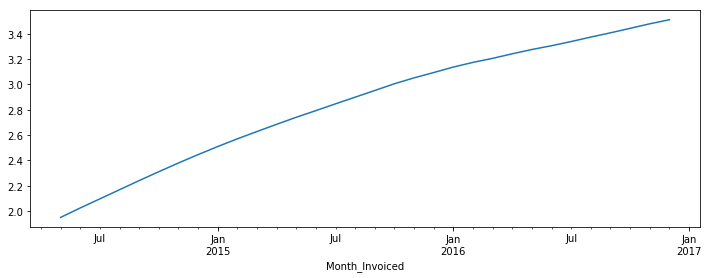

In [13]:
sales.rolling(5).mean().plot(figsize=(12, 4))

# Holts

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
aggregation = 'mean'

In [16]:
train = df[:'2016'].Amount.resample('M').agg(aggregation)
test = df[:'2017'].Amount.resample('M').agg(aggregation)

In [17]:
print('Observations: %d' % (len(train.values) + len(test.values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 84
Training Observations: 36
Testing Observations: 48


In [18]:
pd.concat([train.head(3), train.tail(3)])

Month_Invoiced
2014-01-31    1.792500
2014-02-28    1.878283
2014-03-31    1.953926
2016-10-31    3.512282
2016-11-30    3.546747
2016-12-31    3.569420
Name: Amount, dtype: float64

In [19]:
pd.concat([test.head(3), test.tail(3)])

Month_Invoiced
2014-01-31    1.792500
2014-02-28    1.878283
2014-03-31    1.953926
2017-10-31    3.835197
2017-11-30    3.851269
2017-12-31    3.866969
Name: Amount, dtype: float64

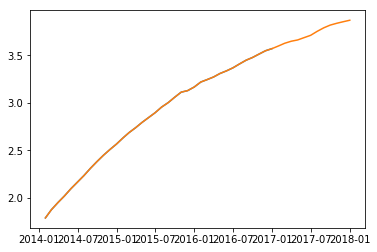

In [20]:
plt.plot(train)
plt.plot(test)
plt.show()

# Simple Average

In [21]:
yhat = pd.DataFrame(dict(actual=test))

In [22]:
yhat['avg_forcast'] = train.mean()

In [23]:
yhat.head()

,actual,avg_forcast
Month_Invoiced,,
2014-01-31,1.792500,2.836171
2014-02-28,1.878283,2.836171
2014-03-31,1.953926,2.836171
2014-04-30,2.022099,2.836171
2014-05-31,2.099527,2.836171


In [24]:
# def plot_data_and_predictions(predictions, label):
#     plt.figure(figsize=(10, 8))

#     plt.plot(train,label='Train')
#     plt.plot(test, label='Test')
#     plt.plot(predictions, label=label, linewidth=5)

#     plt.legend(loc='best')
#     plt.show()


# def evaluate(actual, predictions, output=True):
#     mse = metrics.mean_squared_error(actual, predictions)
#     rmse = math.sqrt(mse)

#     if output:
#         print('MSE:  {}'.format(mse))
#         print('RMSE: {}'.format(rmse))
#     else:
#         return mse, rmse    

# def plot_and_eval(predictions, actual=test, metric_fmt='{:.2f}', linewidth=4):
#     if type(predictions) is not list:
#         predictions = [predictions]

#     plt.figure(figsize=(16, 8))
#     plt.plot(train,label='Train')
#     plt.plot(test, label='Test')
    
# for yhat in predictions:
#         mse, rmse = evaluate(actual, yhat, output=False)        
#         label = f'{yhat.name}'
#         if len(predictions) > 1:
#             label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
#         plt.plot(yhat, label=label, linewidth=linewidth)
        
# if len(predictions) == 1:
#     label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
#     plt.title(label)

# plt.legend(loc='best')
# plt.show()    

# Moving Average

In [25]:
periods = 30
yhat['moving_avg_forecast_30'] = train.rolling(30).mean().iloc[-1]

In [26]:
# plot_and_eval(yhat.moving_avg_forecast_30)

# Holts

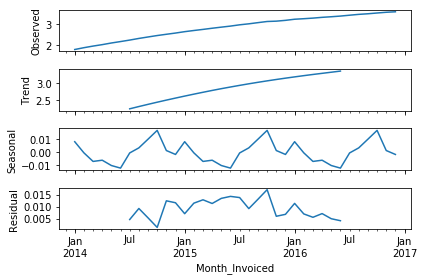

In [27]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
plt.show()

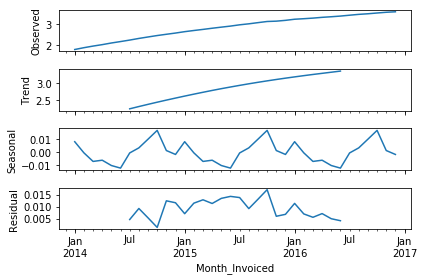

In [28]:
train = df[:'2016'].Amount.resample('M').agg(aggregation)
test = df['2017':].Amount.resample('M').agg(aggregation)

sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
plt.show()


In [29]:
from statsmodels.tsa.api import Holt

# Holt(train).fit(smoothing_level=.9, smoothing_slope=.1)

# yhat['holt_linear'] = holt.forecast(test.shape[0])
# test
# plot_and_eval(y_hat.holt_linear)

# predicting based on last year's data

In [30]:
# using_last_year = train['2016']\
#     .reset_index()\
#     .drop(columns='Month_Invoiced')\
#     .set_index(train['2016'].index + 366)\
#     .iloc[:-1]

# yhat['last_year'] = using_last_year

In [31]:
# plot_and_eval(yhat.last_year, linewidth=1)

In [32]:
# predictions = train['2016'] + train.diff(365).mean()
# predictions.index = pd.date_range('20170101', periods =366)
# predictions = predictions[:-1]
# predictions.name = 'Last Year + Mean'

# plot_and_eval(predictions, linewidth=1)

# Prophet

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# from summarize import df_summary

import acquire

# Using store item demand
Predict 2018 total monthly sales for a single store and/or item by creating a model using prophet

Return a data frame with the month, storeid, yhat, and the confidence intervals (yhat lower, yhat upper)

Plot the 2018 monthly sales predictions


In [34]:
df= acquire.merge_dataframes()

In [35]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [36]:
# df.set_index('sale_date', inplace=True)

In [37]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [38]:
df.dtypes

item_id            int64
sale_amount      float64
sale_date         object
sale_id            int64
store_id           int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
item_brand        object
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

In [ ]:
df

In [39]:
df.sale_date = pd.to_datetime(df.sale_date,format='%d%b%Y:%H:%M:%S.%f')

# df['timestamp'] =  pd.to_datetime(df['timestamp'], format='%d%b%Y:%H:%M:%S.%f')

ValueError: time data 'Tue, 01 Jan 2013 00:00:00 GMT' does not match format '%d%b%Y:%H:%M:%S.%f' (match)

In [ ]:
df.head()

In [ ]:
df1 = df[df['store_id']==2]
df1 = df1[df1['item_brand']=='Kelloggs']

In [ ]:
df1['y'] = df1.sale_amount * df1.item_price
df1['ds'] = pd.to_datetime(df1.sale_date)
# df1 = df1.resample('M')
df1 = df1.groupby(['ds'])['y'].sum().reset_index()

# sales = train.resample('M').Amount.sum()

In [ ]:
df.tail()

In [ ]:
df1.head()

In [ ]:
plt.figure(figsize=(16,6))
sns.tsplot(df1.y)

# Model

## Create an instance of the Prophet class and then fit our dataframe to it

In [ ]:
df1['cap'] = 600
df1['floor'] = 100

m = Prophet(growth='logistic', changepoint_range=0.9)
m.fit(df1)


## Create a "future" dataframe

In [ ]:
future = m.make_future_dataframe(periods=180)
future['cap'] = 600
future['floor'] = 100

print(future.head())
print(future.tail())
print(df1.tail())

## predict

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

# Evaluate

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics


In [ ]:
df_cv = cross_validation(m, horizon='90 days')

In [ ]:
df_p = performance_metrics(df_cv)

In [ ]:
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component


In [ ]:
fig3 = plot_cross_validation_metric(df_cv, metric='rmse')